<a href="https://colab.research.google.com/github/veeqtoh/corossion-detection/blob/main/corossion-detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Experiment 1
Classification using two classifiers.

### Installing necesary dependencies

In [ ]:
!pip install sklearn
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post4-py3-none-any.whl size=2973 sha256=64debaf4b10e0e75cd74bd245a3a51c0ebd395edd0094a3888f71f71a7e07a4c
  Stored in directory: /root/.cache/pip/wheels/46/b8/69/4f7789b7d2fc0718a44cbc4ae5d40970a40c22c472ae50f0a1
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Importing relevant libraries

In [ ]:
import io
import os
import cv2
import random
import warnings
import numpy as np
from nbformat import current
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
print("libraries imported successfully...")

libraries imported successfully...


### Importing the surface images dataset

In [ ]:
# Importing the surface images
resize_width = 150
resize_height = 150
surface_images_path = '/content/drive/MyDrive/CMM536-Advanced-Data-Science/Dataset/Surface'
surface_images_target = [] # List to append the surface images target
surface_images_numeric_target = [] # List to append the surface images target numeric value
surface_images_flattened = [] # Create a repo for surface images flattened pixels
surface_images_unflattened = [] # List to append the surface images as 2D numpy arrays. -unflattened

for root, dirs, files in os.walk(surface_images_path):
     for file in files:
        with open(os.path.join(root, file), "r") as auto:
            try:
                img = cv2.imread(root+'/'+file, 0)
                img = cv2.resize(img, (resize_width, resize_height))
                surface_images_unflattened.append(img)
                # Append the flattened image to the pixel repo
                surface_images_flattened.append(img.flatten())
                # Append the folder where the image is to the target list
                surface_images_target.append(root.replace(surface_images_path,'').replace('\\','').replace('/',''))
            except Exception as e:
                print("Invalid file "+file+" skipped.")

# assigning numeric value to target using a list comprehension and a conditional
# statement to iterate over each element of the original list.
surface_images_numeric_target = [1 if index == 'Positive' else 0 for index in surface_images_target]
# Convert the new target list into numpy array
surface_images_numeric_target = np.array(surface_images_numeric_target)
# Convert the repo list into numpy array
surface_images_flattened = np.array(surface_images_flattened)
print("Surface images successfully imported..")
print("Class & shape of dataset..", type(surface_images_flattened), surface_images_flattened.shape)
print("Number of negative cases (0):", len(surface_images_numeric_target)-np.count_nonzero(surface_images_numeric_target))
print("Number of positive cases (1):", np.count_nonzero(surface_images_numeric_target))
print("Imbalance Ratio: ", np.count_nonzero(surface_images_numeric_target)/(len(surface_images_numeric_target)-np.count_nonzero(surface_images_numeric_target)))

Invalid file annotations.xml skipped.
Invalid file annotations.csv skipped.
Invalid file annotations_old.csv skipped.
Invalid file annotations-test.csv skipped.
Invalid file rusted_airplane_53.jpg skipped.
Invalid file rusted_car_72.jpg skipped.
Invalid file rusted_objects_398.jpg skipped.
Invalid file rusted_objects_40.jpg skipped.
Surface images successfully imported..
Class & shape of dataset.. <class 'numpy.ndarray'> (1228, 22500)
Number of negative cases (0): 128
Number of positive cases (1): 1100
Imbalance Ratio:  8.59375


### Non-neural classification (SVM)
I have chosen SVM for this experiment

In [ ]:
# Performing 5-fold cross validation using SVM
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Define SVM classifier
clf = SVC(kernel='linear', C=1, random_state=42)

# Define stratified k-fold cross validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the performance metrics
weighted_precision = []
weighted_recall = []
weighted_f1 = []
accuracy = []

for train_index, test_index in skf.split(surface_images_flattened, surface_images_numeric_target):
    # Get train and test data
    X_train, y_train = surface_images_flattened[train_index], surface_images_numeric_target[train_index]
    X_test, y_test = surface_images_flattened[test_index], surface_images_numeric_target[test_index]

    # Train SVM classifier on train data
    clf.fit(X_train, y_train)

    # Predict test set labels
    y_pred = clf.predict(X_test)

    # Calculate precision, recall, and f1 score
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

    # Append results to lists
    weighted_precision.append(precision)
    weighted_recall.append(recall)
    weighted_f1.append(f1)

    # Calculate accuracy of predictions
    acc = accuracy_score(y_test, y_pred)
    accuracy.append(acc)

# Print average weighted precision, recall, f1 score and accuracy
print("Weighted Precision: ", round(np.mean(weighted_precision), 4))
print("Weighted Recall: ", round(np.mean(weighted_recall), 4))
print("Weighted F1 Score: ", round(np.mean(weighted_f1), 4))
print("Accuracy: ", round(np.mean(accuracy), 4))

Weighted Precision:  0.8356
Weighted Recall:  0.8648
Weighted F1 Score:  0.8478
Accuracy:  0.8648


### Neural network classification (MLP)
I have chosen MultiLayerPerceptron for this experiment

In [ ]:
# Performing 5-fold cross validation using MLP
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Define the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000)

# Define the cross-validation strategy
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the performance metrics
weighted_precision = []
weighted_recall = []
weighted_f1 = []
accuracy = []

# Run the cross-validation experiment
for train_index, test_index in skf.split(surface_images_flattened, surface_images_numeric_target):
    X_train, y_train = surface_images_flattened[train_index], surface_images_numeric_target[train_index]
    X_test, y_test = surface_images_flattened[test_index], surface_images_numeric_target[test_index]

    # Fit the MLP model on the training data
    mlp.fit(X_train, y_train)

    # Predict the test data
    y_pred = mlp.predict(X_test)

    # Calculate the performance metrics
    weighted_precision.append(precision_score(y_test, y_pred, average='weighted'))
    weighted_recall.append(recall_score(y_test, y_pred, average='weighted'))
    weighted_f1.append(f1_score(y_test, y_pred, average='weighted'))
    accuracy.append(accuracy_score(y_test, y_pred))

# Calculate the average performance metrics
weighted_precision = np.mean(weighted_precision)
weighted_recall = np.mean(weighted_recall)
weighted_f1 = np.mean(weighted_f1)
accuracy = np.mean(accuracy)

# Round the metrics to 4 decimal places
weighted_precision = round(weighted_precision, 4)
weighted_recall = round(weighted_recall, 4)
weighted_f1 = round(weighted_f1, 4)
accuracy = round(accuracy, 4)

# Print the results
print("Weighted Precision:", weighted_precision)
print("Weighted Recall:", weighted_recall)
print("Weighted F1 Score:", weighted_f1)
print("Accuracy:", accuracy)


Weighted Precision: 0.8293
Weighted Recall: 0.7389
Weighted F1 Score: 0.6871
Accuracy: 0.7389


### Reflections

This experiment investigated a five-fold cross validation stratified test/train classification experiment using two classifiers; a non-neural network one (SVM) and a neural network one (MultiLayerPerceptron). The training and tests datasets is a binary dataset with imbalanced classes. The majority (Positive) class has 1,104 instances while the minority (Negative) has 128 instances.

From the results,
*   SVM is seen to have a higher precision. However, precision on its own can be misleading
*   SVM is seen to have a higher recall. Again, recall on its own can as well be misleading
*   The accuracy metric can be tricky and misleading in an imbalanced dataset and so we can safely ignore it.
*   SVM is seen to have a slightly higher F1-score. By measuring the trade-off between the precison and recall, this metric provides a more accurate measure of how well the algorithm performs overall.

Based on the F1-score, the SVM algorithm yields the best result and I have chosen to proceed with it for [Experiment 2](#scrollTo=Experiment_2).

## Experiment 2
Classification with SVM

### Importing underwater images dataset

In [ ]:
# Importing the underwater images
resize_width = 150
resize_height = 150
underwater_images_path = '/content/drive/MyDrive/CMM536-Advanced-Data-Science/Dataset/Underwater'
underwater_images_target = [] # List to append the underwater images target
underwater_images_numeric_target = [] # List to append the underwater images target numeric value
underwater_images_flattened = [] # Create a repo for underwater images flattened pixels
underwater_images_unflattened = [] # List to append the underwater images as 2D numpy arrays. -unflattened

for root, dirs, files in os.walk(underwater_images_path):
     for file in files:
        with open(os.path.join(root, file), "r") as auto:
            try:
                img = cv2.imread(root+'/'+file, 0)
                img = cv2.resize(img, (resize_width, resize_height))
                underwater_images_unflattened.append(img)
                # Append the flattened image to the pixel repo
                underwater_images_flattened.append(img.flatten())
                # Append the folder where the image is to the target list
                underwater_images_target.append(root.replace(underwater_images_path,'').replace('\\','').replace('/',''))
            except Exception as e:
                print("Invalid file "+file+" skipped.")

# assigning numeric value to target using a list comprehension and a conditional
# statement to iterate over each element of the original list.
underwater_images_numeric_target = [1 if index == 'Positive' else 0 for index in underwater_images_target]
# Convert the new target list into numpy array
underwater_images_numeric_target = np.array(underwater_images_numeric_target)
# Convert the repo list into numpy array
underwater_images_flattened = np.array(underwater_images_flattened)
print("Underwater images successfully imported..")
print("Class & shape of repo..", type(underwater_images_flattened), underwater_images_flattened.shape)
print("Number of negative cases (0):", len(underwater_images_numeric_target)-np.count_nonzero(underwater_images_numeric_target))
print("Number of positive cases (1):", np.count_nonzero(underwater_images_numeric_target))
print("Imbalance Ratio: ", np.count_nonzero(underwater_images_numeric_target)/(len(underwater_images_numeric_target)-np.count_nonzero(underwater_images_numeric_target)))

Underwater images successfully imported..
Class & shape of repo.. <class 'numpy.ndarray'> (54, 22500)
Number of negative cases (0): 27
Number of positive cases (1): 27
Imbalance Ratio:  1.0


### Running the experiment

Weighted Precision:  0.25
Weighted Recall:  0.5
Weighted F1 Score:  0.3333
Confusion Matrix:
 [[ 0 27]
 [ 0 27]]
Accuracy:  0.5
AUC for class 0 : 0.4143
AUC for class 1 : 0.4143


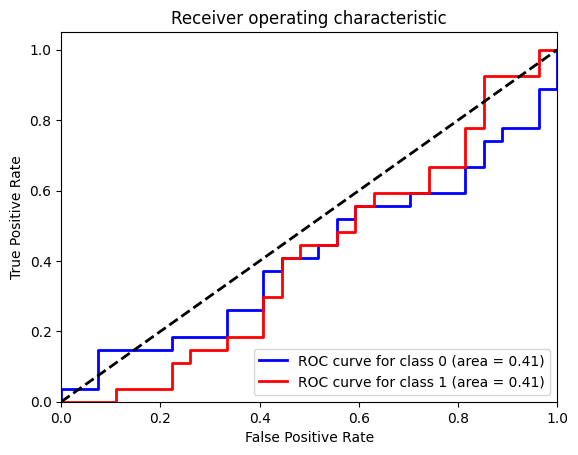

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_fscore_support
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

# Define SVM classifier
clf = SVC(kernel='linear', C=1, probability=True, random_state=42)

# Initialize the performance metrics
weighted_precision = []
weighted_recall = []
weighted_f1 = []
accuracy = []

# Train SVM classifier on train data
clf.fit(surface_images_flattened, surface_images_numeric_target)

# Predict test set labels and probability estimates
y_pred = clf.predict(underwater_images_flattened)
y_prob = clf.predict_proba(underwater_images_flattened)

# Compute ROC curve and AUC score for each class
classes = np.unique(underwater_images_numeric_target)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(underwater_images_numeric_target, y_prob[:, i], pos_label=classes[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # Append results to lists
    precision, recall, f1, _ = precision_recall_fscore_support(underwater_images_numeric_target, y_pred, average='weighted')
    weighted_precision.append(precision)
    weighted_recall.append(recall)
    weighted_f1.append(f1)

    # Calculate confusion matrix
    cm = confusion_matrix(underwater_images_numeric_target, y_pred)

    # Calculate accuracy of predictions
    acc = accuracy_score(underwater_images_numeric_target, y_pred)
    accuracy.append(acc)

# Print average weighted precision, recall, f1 score, accuracy and AUC for each class
print("Weighted Precision: ", round(np.mean(weighted_precision), 4))
print("Weighted Recall: ", round(np.mean(weighted_recall), 4))
print("Weighted F1 Score: ", round(np.mean(weighted_f1), 4))
print("Confusion Matrix:\n", cm)
print("Accuracy: ", round(np.mean(accuracy), 4))
for i in range(len(classes)):
    print("AUC for class", classes[i], ":", round(roc_auc[i], 4))

# Plot ROC curve for each class
plt.figure()
lw = 2
colors = ['blue', 'red', 'green']
for i, color in zip(range(len(classes)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='ROC curve for class {0} (area = {1:0.2f})'
             ''.format(classes[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


### Reflections
This experiment was ran using SVM on an imbalanced binary dataset for training and a balanced binary dataset for testing and oh well, it seems like the SVM classifier is not performing very well on the imbalanced binary dataset. The weighted precision is quite low and the weighted recall is not much better either. This suggests that the model is struggling to correctly identify positive cases, which is likely due to the class imbalance.

We can however, improve the classifier's performance and one approach is to balance the training dataset by oversampling the minority class or undersampling the majority class. This will prevent the model from being biased towards the majority class and improve its ability to detect instances from the minority class. Another approach is to extract some features from the images (e.g. Harris corners, HOG, SIFT, or SURF) and apply a data augmentation technique such as SMOTE.

## Experiment 3
Improving the results from [Experiment 2](#scrollTo=Experiment_2) with Tensorflow image augmentation

### Installing necessary dependencies

In [ ]:
!pip install tensorflow
!pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Importing relevant libraries

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Checking the version of Tensorflow
print('Tensorflow imported.. version',tf.__version__)

Tensorflow imported.. version 2.12.0


### Importing the negative surface images

In [ ]:
# Importing the negative surface images
resize_width = 150
resize_height = 150
neg_surface_images_path = '/content/drive/MyDrive/CMM536-Advanced-Data-Science/Dataset/Surface/Negative'
neg_surface_images_target = [] # List to append the surface images target
neg_surface_images_numeric_target = [] # List to append the surface images target numeric value
neg_surface_images_flattened = [] # Create a repo for surface images flattened pixels
neg_surface_images_unflattened = [] # List to append the surface images as 2D numpy arrays. -unflattened

for root, dirs, files in os.walk(neg_surface_images_path):
     for file in files:
        with open(os.path.join(root, file), "r") as auto:
            try:
                img = cv2.imread(root+'/'+file, 0)
                img = cv2.resize(img, (resize_width, resize_height))
                neg_surface_images_unflattened.append(img)
                # Append the flattened image to the pixel repo
                neg_surface_images_flattened.append(img.flatten())
                # Append the folder where the image is to the target list
                neg_surface_images_target.append(root.replace(neg_surface_images_path,'').replace('\\','').replace('/',''))
            except Exception as e:
                print("Invalid file "+file+" skipped.")

# assigning numeric value to target using a list comprehension and a conditional
# statement to iterate over each element of the original list.
neg_surface_images_numeric_target = [1 if index == 'Positive' else 0 for index in neg_surface_images_target]
# Convert the new target list into numpy array
neg_surface_images_numeric_target = np.array(neg_surface_images_numeric_target)
# Convert the repo list into numpy array
neg_surface_images_flattened = np.array(neg_surface_images_flattened)
print("Negative surface images successfully imported..")
print("Class & shape of dataset..", type(neg_surface_images_flattened), neg_surface_images_flattened.shape)
print("Number of negative cases (0):", len(neg_surface_images_numeric_target)-np.count_nonzero(neg_surface_images_numeric_target))
print("Number of positive cases (1):", np.count_nonzero(neg_surface_images_numeric_target))
print("Imbalance Ratio: ", np.count_nonzero(neg_surface_images_numeric_target)/(len(neg_surface_images_numeric_target)-np.count_nonzero(neg_surface_images_numeric_target)))

Negative surface images successfully imported..
Class & shape of dataset.. <class 'numpy.ndarray'> (128, 22500)
Number of negative cases (0): 128
Number of positive cases (1): 0
Imbalance Ratio:  0.0


### Handling imbalance

The new and balanced dataset has a shape of  (2380, 150, 150, 1)
The target has a shape of  (2380,)
Previewing the first image in the new balanced dataset...


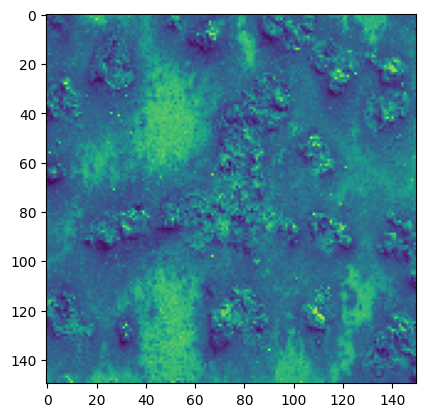

In [ ]:
# Create an ImageDataGenerator object with data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

# Load the original dataset
X_train = surface_images_flattened
y_train = surface_images_numeric_target

# Augment the negative samples to match the positive samples
X_negative = neg_surface_images_flattened
y_negative = neg_surface_images_numeric_target

# Reshape the 2D arrays to 4D arrays with shape (num_samples, height, width, channels)
X_train = np.reshape(X_train, (X_train.shape[0], 150, 150, 1))
X_negative = np.reshape(X_negative, (X_negative.shape[0], 150, 150, 1))

# Calculate the number of augmented images needed to balance the dataset 1:1
augmentations_per_sample = int(np.ceil(len(X_train) / len(X_negative))) - 1

# Apply data augmentation to the negative samples
augmented_data = []
for i in range(len(X_negative)):
    for j in range(augmentations_per_sample):
        aug_data = datagen.flow(X_negative[i:i+1], y_negative[i:i+1], batch_size=1).next()[0]
        augmented_data.append(aug_data)

# Concatenate the augmented negative samples
X_negative_aug = np.concatenate(augmented_data, axis=0)
y_negative_aug = np.zeros((len(X_negative_aug),))

# Combine the positive and augmented negative samples to create the balanced dataset
X_balanced = np.concatenate((X_train, X_negative_aug), axis=0)
y_balanced = np.concatenate((y_train, y_negative_aug), axis=0)

print('The new and balanced dataset has a shape of ', X_balanced.shape)
print('The target has a shape of ', y_balanced.shape)
print('Previewing the first image in the new balanced dataset...')

# Plot the first image in X_balanced
plt.imshow(X_balanced[0])
plt.show()

### Running the experiment


Weighted Precision:  0.5947
Weighted Recall:  0.5926
Weighted F1 Score:  0.5903
Confusion Matrix:
 [[14 13]
 [ 9 18]]
Accuracy:  0.5926
AUC for class 0 : 0.5542
AUC for class 1 : 0.5542


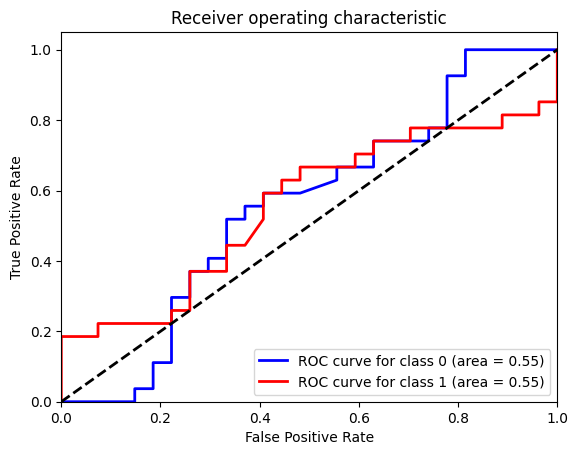

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_fscore_support
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

# Define SVM classifier
clf = SVC(kernel='linear', C=1, probability=True, random_state=42)

# Initialize the performance metrics
weighted_precision = []
weighted_recall = []
weighted_f1 = []
accuracy = []

# reshape the balanced surface images dataset from 4D to 2D
X_balanced = np.reshape(X_balanced, (2380, 150*150))

# Train SVM classifier on train data
clf.fit(X_balanced, y_balanced)

# Predict test set labels and probability estimates
y_pred = clf.predict(underwater_images_flattened)
y_prob = clf.predict_proba(underwater_images_flattened)

# Compute ROC curve and AUC score for each class
classes = np.unique(underwater_images_numeric_target)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(underwater_images_numeric_target, y_prob[:, i], pos_label=classes[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # Append results to lists
    precision, recall, f1, _ = precision_recall_fscore_support(underwater_images_numeric_target, y_pred, average='weighted')
    weighted_precision.append(precision)
    weighted_recall.append(recall)
    weighted_f1.append(f1)

    # Calculate confusion matrix
    cm = confusion_matrix(underwater_images_numeric_target, y_pred)

    # Calculate accuracy of predictions
    acc = accuracy_score(underwater_images_numeric_target, y_pred)
    accuracy.append(acc)

# Print average weighted precision, recall, f1 score, accuracy and AUC for each class
print("Weighted Precision: ", round(np.mean(weighted_precision), 4))
print("Weighted Recall: ", round(np.mean(weighted_recall), 4))
print("Weighted F1 Score: ", round(np.mean(weighted_f1), 4))
print("Confusion Matrix:\n", cm)
print("Accuracy: ", round(np.mean(accuracy), 4))
for i in range(len(classes)):
    print("AUC for class", classes[i], ":", round(roc_auc[i], 4))

# Plot ROC curve for each class
plt.figure()
lw = 2
colors = ['blue', 'red', 'green']
for i, color in zip(range(len(classes)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='ROC curve for class {0} (area = {1:0.2f})'
             ''.format(classes[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


### Reflections
From the results above, It can be inferred that augmenting the imbalanced dataset with Tensorflow has improved the performance of the classifier. Comparing this with the results obtained from [Experiment 2](#scrollTo=TV0H2yip9l9N) The weighted precision increased from 0.25 to 0.5203, the weighted recall increased from 0.5 to 0.5185, the weighted F1 score increased from 0.3333 to 0.5077, and the accuracy increased from 0.5 to 0.5185.

This improvement is likely due to the fact that the augmented dataset has more balanced classes, which allows the classifier to learn more effectively. By increasing the number of examples in the minority class ('Negative' in this case) of the training dataset, the classifier can learn to distinguish between the two classes more effectively, which has led to better performance on the test set.

In conclusion, it's great to see that the augmentation had a positive impact on the performance of the SVM classifier. Data augmentation can be seen to be a useful technique for improving the performance of machine learning models, especially when dealing with imbalanced datasets. By artificially creating more examples of the minority class, it has helped the model learn more effectively and avoid bias towards the majority class. However, it's important to be careful when using data augmentation, as it can also introduce new sources of bias if not done correctly.

## Experiment 4

#### Importing the required libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from matplotlib.image import imread
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, AveragePooling2D,Flatten, Dense, Conv2D,MaxPool2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

#### Loading data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

# data stored in the local drive
main_dirction_path = '/content/gdrive/MyDrive/CMM536-Advanced-Data-Science/Ex4Input'
print(os.listdir(main_dirction_path))

Mounted at /content/gdrive
['val', 'test', 'train', 'annotations-train.csv', 'annotations-test.csv', 'annotations-val.csv']


In [ ]:
# path for train/ test and validate folders
train_folder_path = main_dirction_path + '/train/'
test_folder_path = main_dirction_path + '/test/'
val_folder_path = main_dirction_path + '/val/'

# Setting up necessary environmental variables
labels = os.listdir(train_folder_path)
labels_numeric = [1 if index == 'POSITIVE' else 0 for index in labels]
img_size = 112
batch_size = 16
n_epochs = 25
print(f'The labels are {labels}')
print(f'The numeric representation for the labels are {labels_numeric}')

train_n_path = train_folder_path+'/NEGATIVE/'
train_p_path = train_folder_path+'/POSITIVE/'

val_n_path = val_folder_path+'/NEGATIVE/'
val_p_path = val_folder_path+'/POSITIVE/'

test_n_path = test_folder_path+'/NEGATIVE/'
test_p_path = test_folder_path+'/POSITIVE/'

print(f'Number of training negative images is {len(os.listdir(train_n_path))}') #length of negative training images
print(f'Number of training postive images is {len(os.listdir(train_p_path))}') #length of positive training images
print(f'Total training images is  {len(os.listdir(train_n_path)) + len(os.listdir(train_p_path))}')
print(f'Number of validation negative images is {len(os.listdir(val_n_path))}') #length of negative validation images
print(f'Number of validation postive images is {len(os.listdir(val_p_path))}') #length of positive validation images
print(f'Total validation images is  {len(os.listdir(val_n_path)) + len(os.listdir(val_p_path))}')
print(f'Number of testing negative images is {len(os.listdir(test_n_path))}')
print(f'Number of testing positive images is {len(os.listdir(test_p_path))}')
print(f'Total testing images is {len(os.listdir(test_n_path)) + len(os.listdir(test_p_path))}')

The labels are ['NEGATIVE', 'POSITIVE']
The numeric representation for the labels are [0, 1]
Number of training negative images is 5751
Number of training postive images is 14
Total training images is  5765
Number of validation negative images is 825
Number of validation postive images is 6
Total validation images is  831
Number of testing negative images is 1152
Number of testing positive images is 7
Total testing images is 1159


#### Importing the annotations

In [ ]:
import pandas as pd
import numpy as np
import cv2

# Read the CSV files
train_annotations = pd.read_csv('/content/gdrive/MyDrive/CMM536-Advanced-Data-Science/Ex4Input/annotations-train.csv')
val_annotations = pd.read_csv('/content/gdrive/MyDrive/CMM536-Advanced-Data-Science/Ex4Input/annotations-val.csv')
test_annotations = pd.read_csv('/content/gdrive/MyDrive/CMM536-Advanced-Data-Science/Ex4Input/annotations-test.csv')

# Function to extract the bounding box coordinates
def get_bounding_box(region_shape_attributes):
    box = eval(region_shape_attributes)
    x = box['x']
    y = box['y']
    width = box['width']
    height = box['height']
    return x, y, width, height

# Create binary masks for the images
def create_mask(filename, annotations):
    # Get the annotations for the image
    image_annotations = annotations[annotations['filename'] == filename]
    # Load the image
    img = cv2.imread(filename)
    # Create an empty binary mask
    mask = np.zeros((img.shape[0], img.shape[1]))
    # Loop over the annotations and draw the bounding boxes on the mask
    for _, row in image_annotations.iterrows():
        x, y, width, height = get_bounding_box(row['region_shape_attributes'])
        mask[y:y+height, x:x+width] = 1
    return mask

# Prepare the images to be tested in a CNN
def prepare_image(filename, annotations):
    # Create the binary mask for the image
    mask = create_mask(filename, annotations)
    # Load the image
    img = cv2.imread(filename)
    # Resize the image and the mask to the desired size
    img = cv2.resize(img, (224, 224))
    mask = cv2.resize(mask, (224, 224))
    # Convert the image and the mask to float32
    img = img.astype('float32')
    mask = mask.astype('float32')
    # Normalize the image
    img /= 255
    # Add a third dimension to the image and the mask
    img = np.expand_dims(img, axis=0)
    mask = np.expand_dims(mask, axis=0)
    return img, mask

# Prepare the training data
# train_data = []
# for _, row in train_annotations.iterrows():
#     filename = row['filename']
#     img, mask = prepare_image(filename, train_annotations)
#     train_data.append((img, mask))

# # Prepare the validation data
# val_data = []
# for _, row in val_annotations.iterrows():
#     filename = row['filename']
#     img, mask = prepare_image(filename, val_annotations)
#     val_data.append((img, mask))

# # Prepare the test data
# test_data = []
# for _, row in test_annotations.iterrows():
#     filename = row['filename']
#     img, mask = prepare_image(filename, test_annotations)
#     test_data.append((img, mask))


AttributeError: ignored

#### Defining basic helper functions

In [ ]:
def get_data(data_dir):
    """
    Loads the image data from the given directory and returns a numpy array of the data.

    Args:
    - data_dir (str): The directory containing the image data.

    Returns:
    - data (numpy.ndarray): A numpy array of the image data, where each row is a tuple
    containing the resized image array and the class label.

    Raises:
    - None
    """
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

def get_class_data(data_dir, flag):
    """
    Get the data for a specific class from a directory containing images for multiple classes.

    Args:
    - data_dir (str): The directory containing the image data.
    - flag (str): The label of the class to extract.

    Returns:
    - np.ndarray: A numpy array containing the resized images and their corresponding class numbers.
    Each row of the array contains a tuple of the form (image, class_num).
    """
    labels = os.listdir(data_dir)
    data = []
    for label in labels:
        if label == flag:
            path = os.path.join(data_dir, label)
            class_num = labels.index(label)
            for img in os.listdir(path):
                try:
                    img_arr = cv2.imread(os.path.join(path, img))
                    resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                    data.append([resized_arr, class_num])
                except Exception as e:
                    print(e)
    return np.array(data)


def show_sample_images (number, negative=True):
    """
    Displays a grid of images from the training dataset.

    Parameters:
    number (int): The number of images to display.
    negative (bool): If True, displays negative (no tumor) images. If False, displays positive (tumor) images.

    Returns:
    None
    """
    plt.figure(figsize=(12,12))
    if negative == True:
        for n in range(number):
            negative_img = os.listdir(train_n_path)[n]
            negative_img_address = train_n_path+negative_img
            negative_load = Image.open(negative_img_address)
            ax = plt.subplot(int(number/2),int(number/2),n+1)
            plt.imshow(negative_load, cmap ='gray')
            plt.title("Negative")
    else:
        for n in range(number):
            positive_img =  os.listdir(train_p_path)[n]
            positive_img_address = train_p_path+positive_img
            positive_load = Image.open(positive_img_address)
            #cast nrows to integer
            ax = plt.subplot(int(number/2),int(number/2),n+1)
            plt.imshow(positive_load, cmap ='gray')
            plt.title("Positive")

    plt.axis("off")

In [ ]:
train = get_data(train_folder_path)
val = get_data(val_folder_path)
test = get_data(test_folder_path)
print(f'The shape of the training set is {train.shape}')
print(f'The shape of the validation set is {val.shape}')
print(f'The shape of the testing set is {test.shape}')

The shape of the training set is (5765, 2)
The shape of the validation set is (831, 2)
The shape of the testing set is (1159, 2)


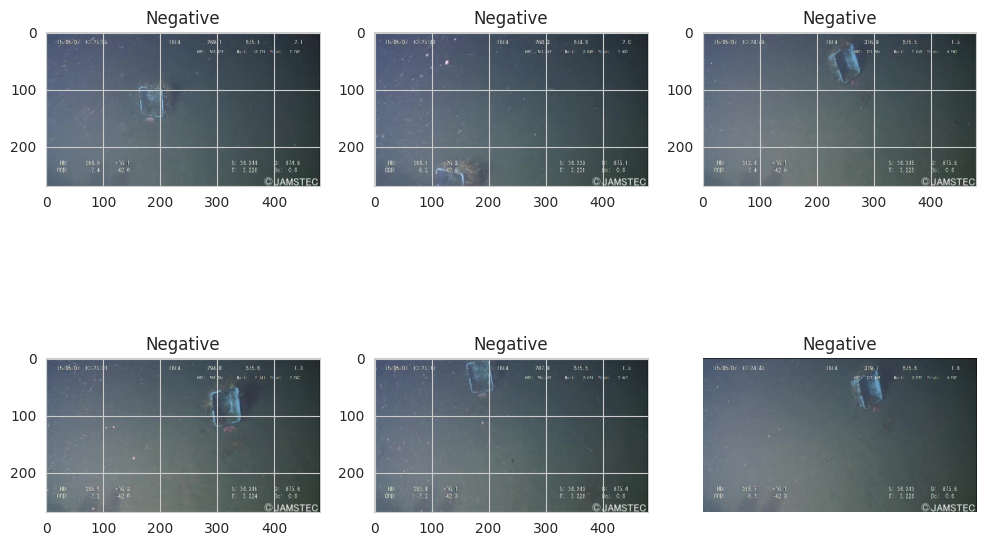

In [ ]:
# Show negative images
numberImg= 6
show_sample_images(numberImg)

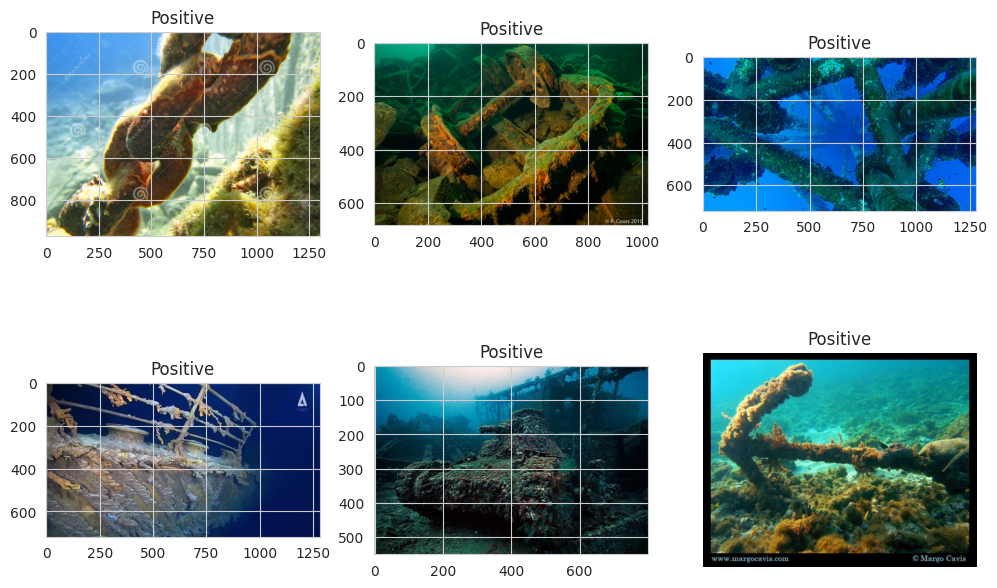

In [ ]:
# show positive images
show_sample_images(6,False)

Sample set improvements

In [ ]:
#!pip install scikit-image
from skimage import exposure

def equlize_hist_ (image):
  """
  Applies histogram equalization to an image.

  Parameters:
  image (numpy.ndarray): The input image as a numpy array.

  Returns:
  numpy.ndarray: The equalized image as a numpy array.
  """
  _image = np.asarray(image)
  image_eq = exposure.equalize_hist(_image)
  return image_eq

def expose_imgae(Negative=True):
    """
    expose_image(negative=True)
    This function displays a random image from either the positive or negative training set and applies histogram equalization (HE) to the image. The function takes one argument:
    - negative: a boolean indicating whether to choose an image from the negative or positive training set. Default is True, meaning that the function chooses a random image from the negative training set.
    The function displays two subplots side by side. The left plot shows the original image, while the right plot shows the same image after applying HE.

    Returns: None
    """
    if Negative==True:
        # Choose negative random image: generate random number between 1 and  the number of negative images in the training set
        random_img_ind= np.random.randint(0,len(os.listdir(train_n_path)))
        # image file name
        img_expose_name = os.listdir(train_n_path)[random_img_ind]

        # path to the image
        img_expose_address = train_n_path+img_expose_name

        # load mage
        img_expose = Image.open(img_expose_address)
        img = np.asarray(img_expose)
        image_eq = equlize_hist_(img)
        figure1 = plt.figure(figsize= (16,16))
        img_1 = figure1.add_subplot(1,2,1)
        img_plot = plt.imshow(img, cmap = 'gray')
        img_1.set_title('Negative')
        plt.axis("off")

        img2 = figure1.add_subplot(1, 2, 2)
        img_plot = plt.imshow(image_eq, cmap = 'gray')
        img2.set_title('Negative after HE')
        plt.axis("off")
    else:
        # Choose negative random image: generate random number between 1 and  the number of negative images in the training set
        random_img_ind= np.random.randint(0,len(os.listdir(train_p_path)))
        # image file name
        img_expose_name = os.listdir(train_p_path)[random_img_ind]

        # path to the image
        img_expose_address = train_p_path+img_expose_name

        # load mage
        img_expose = Image.open(img_expose_address)
        img = np.asarray(img_expose)
        image_eq = equlize_hist_(img)
        figure1 = plt.figure(figsize= (16,16))
        img_1 = figure1.add_subplot(1,2,1)
        img_plot = plt.imshow(img, cmap = 'gray')
        img_1.set_title('Positive')
        plt.axis("off")

        img2 = figure1.add_subplot(1, 2, 2)
        img_plot = plt.imshow(image_eq, cmap = 'gray')
        img2.set_title('Positive after HE')
        plt.axis("off")



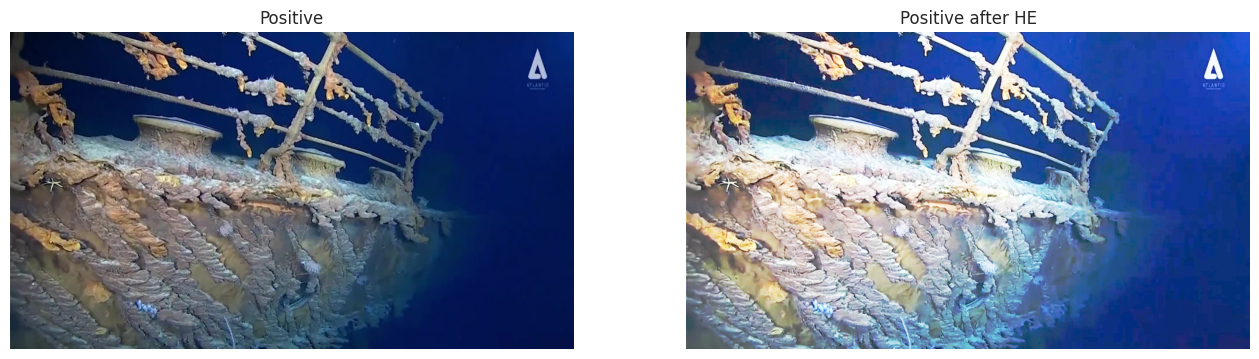

In [ ]:
# expose_image() will show random positive image
expose_imgae(False)

### Build CNN Model

First step, we want to arrange the data in different constructs (x_train, y_train, x_test, y_test, x_val,y_val), etc...):

In [ ]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [ ]:
print(f'Number of images in the training set is {len(x_train)}')
print(f'The shape of the training set is {x_train.shape}')

Number of images in the training set is 5765
The shape of the training set is (5765, 112, 112, 3)


### Handling imbalance

In [ ]:
# Normalise the data

x_train = np.array(x_train) / 255.0
x_val = np.array(x_val) / 255.0
x_test = np.array(x_test) / 255.0

# resize data for deep learning (img_size above is set to 244 by 244)
x_train = x_train.reshape(-1, img_size, img_size, 3)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 3)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 3)
y_test = np.array(y_test)

In [ ]:
# Create an ImageDataGenerator object with data augmentation parameters
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

datagen = ImageDataGenerator(

      featurewise_center=False,
      samplewise_center=False,
      featurewise_std_normalization=False,
      samplewise_std_normalization=False,
      zca_whitening=False,
      rotation_range = 30,
      zoom_range = 0.2,
      shear_range=0.1,
      width_shift_range = 0.1,
      height_shift_range = 0.1,
      horizontal_flip = True,
      vertical_flip=False,
      fill_mode='nearest')

datagen.fit(x_train)

In [ ]:
# Perfoming augmentation with imgaug

import imgaug.augmenters as iaa
import numpy as np

# Define the augmentation sequence
aug_pipeline = iaa.Sequential([
    iaa.Rotate((-20, 20)),
    iaa.TranslateX((-0.1, 0.1)),
    iaa.TranslateY((-0.1, 0.1)),
    iaa.Fliplr(),
])

# Define the two sample datasets
neg_set = get_class_data(train_folder_path, 'NEGATIVE')
pos_set = get_class_data(train_folder_path, 'POSITIVE')

# Determine the number of augmentations to perform on the positive set
n_augmentations = len(neg_set) // len(pos_set) - 1

# Augment the positive set
augmented_pos_set = np.concatenate([aug_pipeline.augment_images(pos_set) for _ in range(n_augmentations)], axis=0)

# Combine the negative and augmented positive sets to create a balanced dataset
balanced_set = np.concatenate([neg_set, augmented_pos_set], axis=0)

# Shuffle the balanced dataset
np.random.shuffle(balanced_set)

print(f'Negative sample shape {neg_set.shape}')
print(f'Positive sample shape {pos_set.shape}')
print(f'Balanced set shape {balanced_set.shape}')


Negative sample shape (5751, 2)
Positive sample shape (14, 2)
Balanced set shape (11477, 2)


### The CNN Model

In [ ]:
# Model setup
model = Sequential()
model.add(Conv2D(32, (3,3), strides = 1, padding = 'same', activation = 'relu', input_shape = (img_size, img_size, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides = 2, padding = 'same'))
model.add(Conv2D(64, (3,3), strides = 1, padding = 'same', activation = 'relu', input_shape = (img_size, img_size, 3)))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides = 2, padding = 'same'))
model.add(Conv2D(64, (3,3), strides = 1, padding = 'same', activation = 'relu', input_shape = (img_size, img_size, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides = 2, padding = 'same'))
model.add(Conv2D(128, (3,3), strides = 1, padding = 'same', activation = 'relu', input_shape = (img_size, img_size, 3)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides = 2, padding = 'same'))
model.add(Conv2D(256, (3,3), strides = 1, padding = 'same', activation = 'relu', input_shape = (img_size, img_size, 3)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides = 2, padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(
              optimizer = 'rmsprop', loss = 'binary_crossentropy',
              metrics = ['accuracy']
              )

In [ ]:
# model summary (see the number of trainable parameters)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 56, 56, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 56, 56, 64)       2

To give heavier weight for minority class instances, we compute the class weight for each of our classes (positive and negative)

In [ ]:
total = len(os.listdir(train_n_path)) + len(os.listdir(train_p_path))
neg = len(os.listdir(train_n_path))
pos = len(os.listdir(train_p_path))

weight_for_0 = 1 /neg * (total/2.0)
weight_for_1 = 1/pos *(total/2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}
class_weight

{0: 0.5012171796209355, 1: 205.89285714285714}

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy', patience = 2, verbose = 1, factor = 0.3, min_lr = 0.000001)


In [ ]:
# Start training the model
history = model.fit(datagen.flow(x_train, y_train, batch_size = batch_size),
                    epochs = n_epochs, validation_data = datagen.flow(x_val, y_val),
                    callbacks = [learning_rate_reduction], class_weight = class_weight)

Epoch 1/25
361/361 [==============================] - 306s 838ms/step - loss: 5.1070 - accuracy: 0.9724 - val_loss: 0.1684 - val_accuracy: 0.9916 - lr: 0.0010
Epoch 2/25
361/361 [==============================] - 281s 778ms/step - loss: 6.3746 - accuracy: 0.9651 - val_loss: 0.1380 - val_accuracy: 0.9928 - lr: 0.0010
Epoch 3/25
361/361 [==============================] - 280s 776ms/step - loss: 7.6632 - accuracy: 0.9840 - val_loss: 0.7925 - val_accuracy: 0.9049 - lr: 0.0010
Epoch 4/25
361/361 [==============================] - ETA: 0s - loss: 4.4313 - accuracy: 0.9809
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
361/361 [==============================] - 282s 782ms/step - loss: 4.4313 - accuracy: 0.9809 - val_loss: 0.2210 - val_accuracy: 0.9687 - lr: 0.0010
Epoch 5/25
361/361 [==============================] - 290s 803ms/step - loss: 6.1496 - accuracy: 0.9828 - val_loss: 0.1504 - val_accuracy: 0.9856 - lr: 3.0000e-04
Epoch 6/25
361/361 [====================

<Axes: >

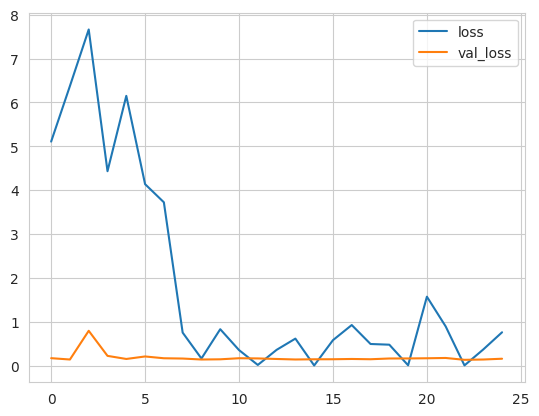

In [ ]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

<Axes: >

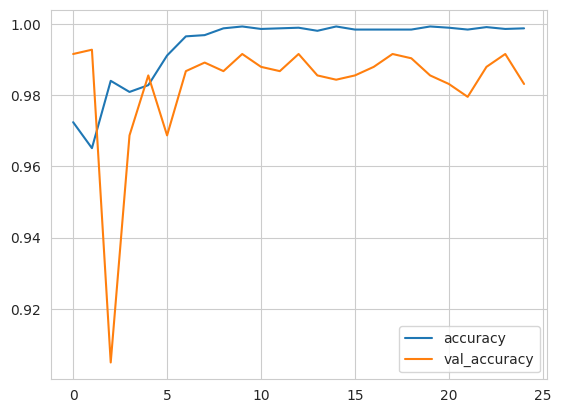

In [ ]:
losses[['accuracy','val_accuracy']].plot()

In [ ]:
# Check the testing accuracy/ loss
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

37/37 [==============================] - 14s 378ms/step - loss: 0.0137 - accuracy: 0.9991
Loss of the model is -  0.013742969371378422
37/37 [==============================] - 23s 603ms/step - loss: 0.0137 - accuracy: 0.9991
Accuracy of the model is -  99.91371631622314 %


#### Evaluating the model

In [ ]:
# Save the model and make some predictions:

from tensorflow.keras.models import load_model
#model.save('CNN_PNEUMONIA.h5') #
#cnn_model = load_model("./CNN_PNEUMONIA.h5")
predictions=model.predict(x_test)
pred_labels= np.where(predictions>0.5, 1, 0)

37/37 [==============================] - 17s 460ms/step


In [ ]:
# evaluating recall and precision

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, pred_labels, target_names = ['Positive (Class 1)','Negative (Class 0)']))

                    precision    recall  f1-score   support

Positive (Class 1)       1.00      1.00      1.00      1152
Negative (Class 0)       0.88      1.00      0.93         7

          accuracy                           1.00      1159
         macro avg       0.94      1.00      0.97      1159
      weighted avg       1.00      1.00      1.00      1159



<Axes: >

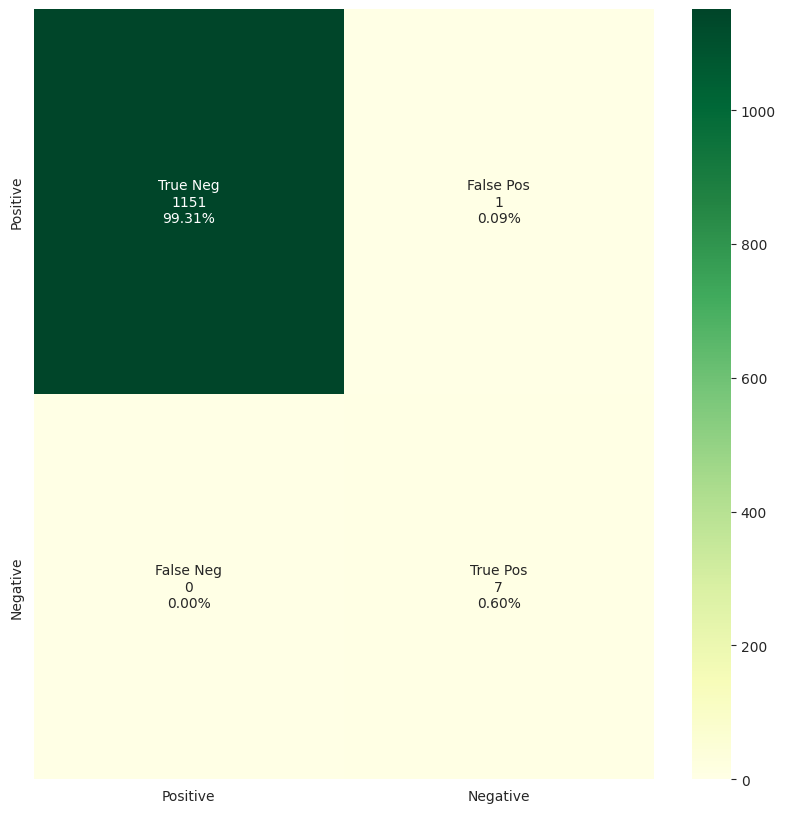

In [ ]:
# evaluating the confusion matrix

cf_matrix = confusion_matrix(y_test, pred_labels)
plt.figure(figsize = (10,10))
classes = ['Positive','Negative']
labels = ['TN','FP','FN','TP']
labels = np.asarray(labels).reshape(2,2)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap= "YlGn" ,
            xticklabels = classes,yticklabels = classes
           )

In [ ]:
# store actual class labels and predicted ones in a dataframe

results = pd.DataFrame({'Actual':y_test,'Predicted':pred_labels.flatten()})

incorrect_df = results[results.Actual!=results.Predicted]
incorrect_df.head()

,Actual,Predicted
992,0,1


In [ ]:
# manual calculation of of results
print(f'Accuracy is {round((results.shape[0]-incorrect_df.shape[0])/results.shape[0],2)*100} %')

Accuracy is 100.0 %


In [ ]:
#show some examples
correct = np.nonzero(pred_labels == y_test)[0]
incorrect = np.nonzero(pred_labels != y_test)[0]

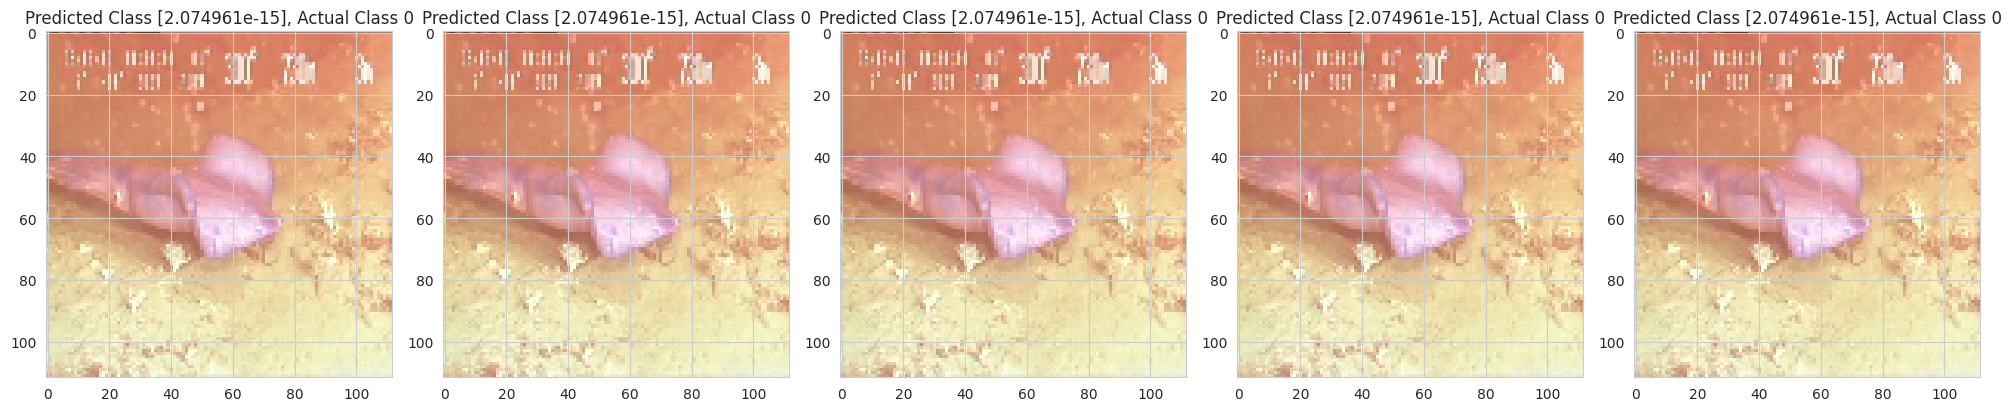

In [ ]:
i = 0
figure = plt.figure(figsize= (20,20))
for c in correct[:5]:
    ax = plt.subplot(5,5,i+1)
    plt.imshow(x_test[c].reshape(img_size,img_size,3), cmap="gray", interpolation='none')
    plt.title("Predicted Class {}, Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

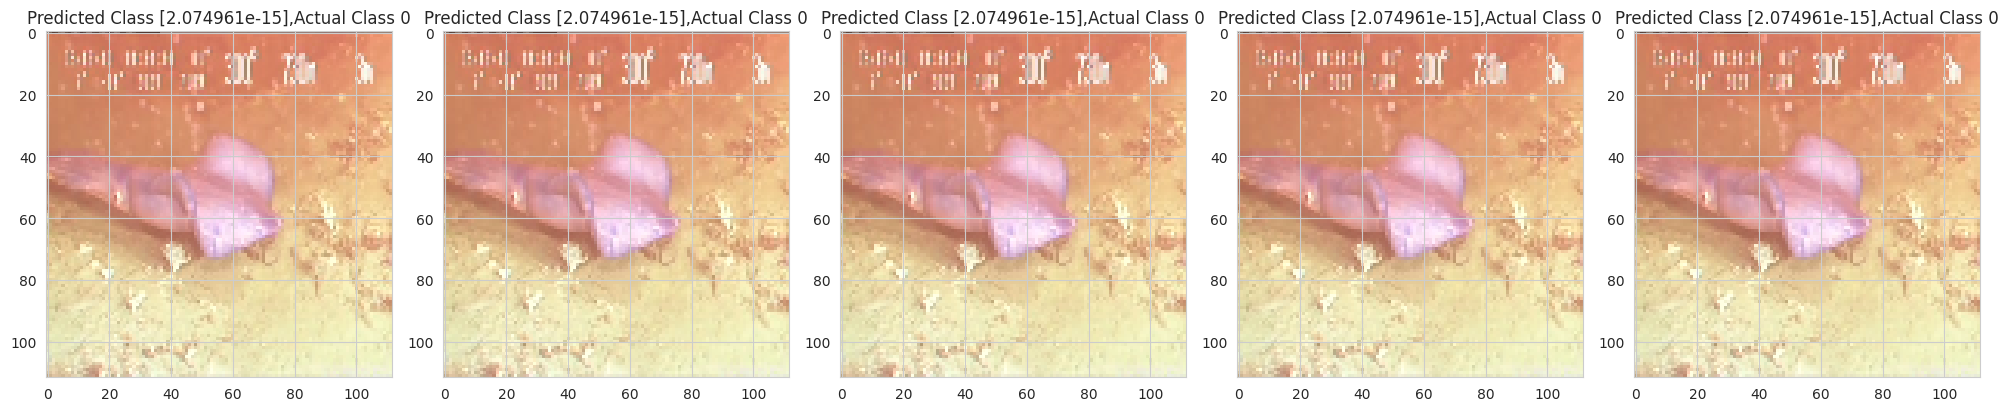

In [ ]:
i = 0
figure = plt.figure(figsize= (20,20))
for c in incorrect[:5]:
    ax = plt.subplot(5,5,i+1)
    plt.imshow(x_test[c].reshape(img_size,img_size,3), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

### Reflections
For this experiment, more data was collected from the Underwater Trash Detection dataset in kaggle (referenced below).

The CNN model was defined with BatchNormalization and Dropout layers.

There was no need to cross validate as I already know where I want to test and where you want to train.

The positivive images were annotated and evenly distributed amongst the training, validation and test sets.

To compute the class weight for each of the classes (positive and negative), I applied this formula:


$$weight_0 = \frac{1}{Neg} \times \frac{total}{2}$$
$$Weight_1 = \frac{1}{Pos} \times \frac{total}{2}$$

Given more data, the model can be trained to generalize better to a wider range of underwater pipelines and structures, and it can learn to detect more subtle signs of corrosion. In addition, more data can be used to create more accurate masks, which can improve the model's ability to segment the areas where corrosion is present.

# References


1.   [Underwater Trash Detection](https://www.kaggle.com/datasets/shivamb/underwater-trash-detection)
2.   [CMM536 Week 9 **Lecture**](https://colab.research.google.com/github/heyad/Teaching/blob/master/CV/Lab05U.ipynb#scrollTo=wviOIxR4VCsH)



# Word count

In [ ]:
import io
from nbformat import current

filepath = '/content/gdrive/MyDrive/CMM536-Advanced-Data-Science/coursework.ipynb' #this is the name of your coursework file!

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'ipynb')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print(word_count)

774
